In [ ]:
!pip install pyunpack
!pip install patool
!pip install py7zr
!pip install sounddevice
!pip install noisereduce
! pip install python_speech_features
! pip install malaya_speech
! pip install webrtcvad

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from py7zr import unpack_7zarchive
import shutil
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

import noisereduce as nr
import tensorflow 
from malaya_speech import Pipeline

import malaya_speech
import os

from python_speech_features import mfcc

from sklearn.preprocessing import LabelEncoder
import seaborn as sn

Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases


16000


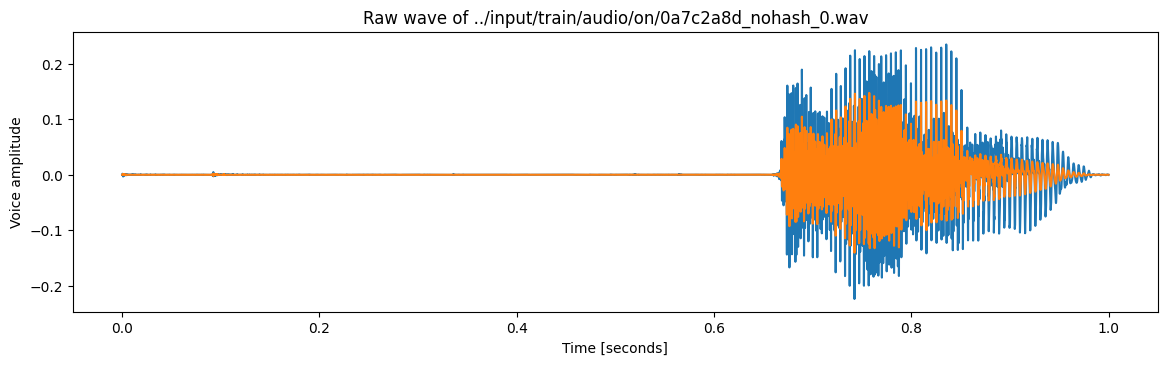

In [2]:
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('train.7z', 'train/')
train_audio_path = 'train/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'on/5a3712c9_nohash_1.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/on/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)
sig1=samples
fs=sample_rate
sr=fs
time = np.linspace(0, len(sig1 - 1) / fs, len(sig1 - 1))
reduced_noise1 = nr.reduce_noise(y=sig1, sr=fs,stationary=True)
plt.plot(time, reduced_noise1)  # plot in seconds
#reduced_noise2 = nr.reduce_noise(y=sig2, sr=fs,stationary=True)
#plt.plot(time, reduced_noise2)  # plot in seconds
#plt.title("Voice Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()
ipd.Audio(reduced_noise1, rate=sample_rate)
#Silence Removal
vad = malaya_speech.vad.webrtc()
y_=reduced_noise1
#y_= malaya_speech.resample(y, sr, 16000)
y_ = malaya_speech.astype.float_to_int(y_)
#frames = malaya_speech.generator.frames(y_, 30, sr)
frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
frames_webrtc = [(frames_[no], vad(frame)) for no, frame in enumerate(frames_)]
y_ = malaya_speech.combine.without_silent(frames_webrtc)
y_
len(y_)
ipd.Audio(y_, rate = sr )
zero = np.zeros((1*sr-y_.shape[0]))
signal = np.concatenate((y_,zero))
signal.shape
time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
labels=os.listdir(train_audio_path)
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

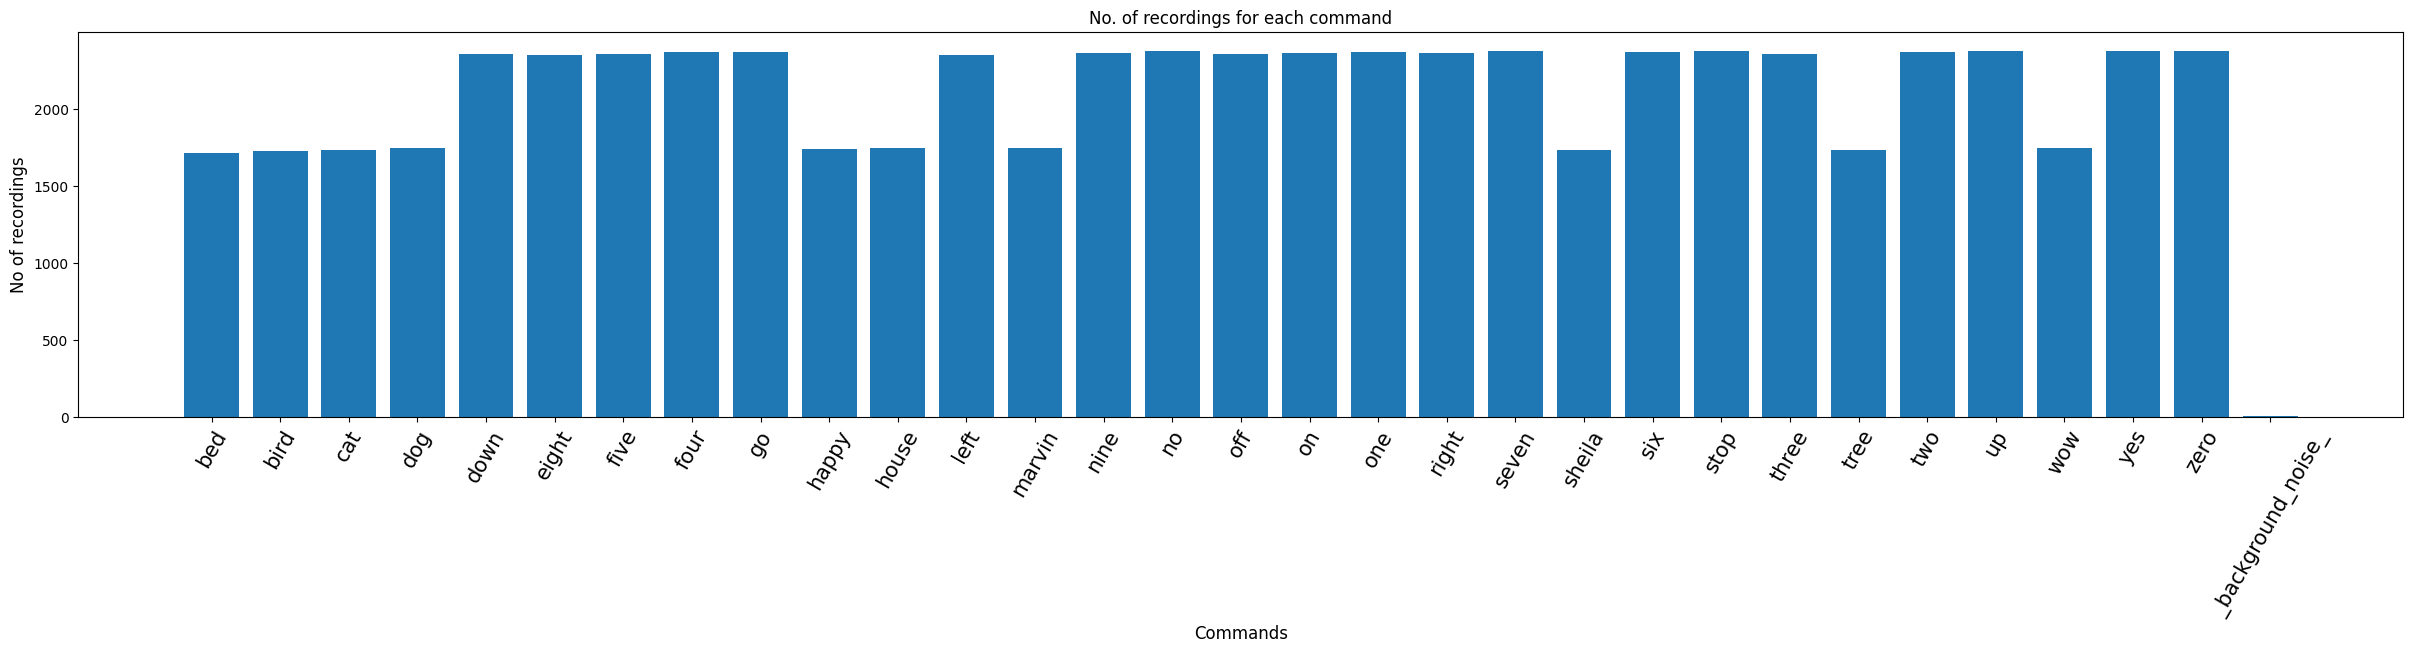

In [3]:
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

on
off
up
down
go
stop
left
right
(18400, 20000)
(18400,)
on
(18400, 13, 156)
(18400,)
bird
cat
yes
nine
zero
marvin
three
five
wow
four
tree
dog
two
no
sheila
house
six
one
happy
bed
seven
eight


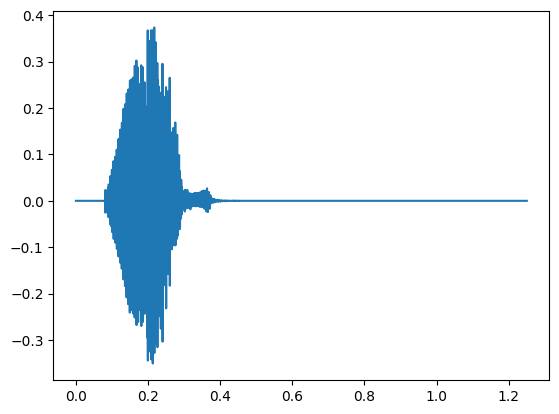

In [6]:
labb=['bird','cat','yes','nine','zero','marvin','three','five','wow','four','tree','dog','two','no','sheila','house','six','one','happy','bed','seven','eight']
len(labb)
labels=["on","off","up","down","go","stop","left","right"]
noise_path_1 = 'D:\program\期末專題\Hospitalnoiseoriginal\Hospitalnoiseoriginal'
noise_path_2='D:\program\期末專題\pinknoise'
label_of_other=['can not be identified']
sr=16000
vad = malaya_speech.vad.webrtc()
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    i=0
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = nr.reduce_noise(y=samples, sr=sr,stationary=True)
        y_= malaya_speech.resample(samples, sr, 16000)
        y_ = malaya_speech.astype.float_to_int(y_)
        frames = malaya_speech.generator.frames(samples, 30, sr)
        frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
        frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
        y_ = malaya_speech.combine.without_silent(frames_webrtc)
        zero = np.zeros(((1*sr+4000)-y_.shape[0]))
        signal = np.concatenate((y_,zero))
        all_wave.append(signal)
        all_label.append(label)
        i+=1
        if i==2300:
            break
print(np.array(all_wave).shape)
print(np.array(all_label).shape)
fs=16000
sr=fs
time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
plt.plot(time,np.array(all_wave)[2000,:])
print(np.array(all_label)[2000])
ipd.Audio(np.array(all_wave)[2000,:], rate = sr )
all_mfcc=[]
for wave in all_wave:
    i=0
    mfcc_feat = mfcc(wave , fs, winlen=256/fs, winstep=256/(2*fs), numcep=13, nfilt=26, nfft=256,
                 lowfreq=0, highfreq=fs/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
    mfcc_feat= np.transpose(mfcc_feat)
    all_mfcc.append(mfcc_feat)
print(np.array(all_mfcc).shape)
print(np.array(all_label).shape)
d1=np.array(all_mfcc).shape[1]
d2=np.array(all_mfcc).shape[2]
d=d1*d2
noise_waves_1 = os.listdir(noise_path_1)
noise_waves_2 =os.listdir(noise_path_2)
noise_files1=np.array(noise_waves_1[:50])
noise_files2=np.array(noise_waves_2[:50])
noise_files=np.hstack((noise_files1, noise_files2))

#Silence Removal
reduced_noise1 = nr.reduce_noise(y=sig1, sr=fs,stationary=True)

vad = malaya_speech.vad.webrtc()
y=reduced_noise1
y_= malaya_speech.resample(y, sr, 16000)
y_ = malaya_speech.astype.float_to_int(y_)
frames = malaya_speech.generator.frames(y, 30, sr)
frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
y_ = malaya_speech.combine.without_silent(frames_webrtc)
y_=y_[:16000]
zero = np.zeros((1*sr-y_.shape[0]))
signal = np.concatenate((y_,zero))
signal.shape
time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
label_of_other[0]
sr=16000
vad = malaya_speech.vad.webrtc()
noise_wave = []
noise_label = []

i=0
for wav in noise_files:
    if (i<50):
        samples, sample_rate = librosa.load(noise_path_1 + '/' + wav , sr = 16000)
    else:
        samples, sample_rate = librosa.load(noise_path_2 + '/' + wav , sr = 16000)
        
    samples = nr.reduce_noise(y=samples[:16000], sr=sr,stationary=True)
    y_= malaya_speech.resample(samples, sr, 16000)
    y_ = malaya_speech.astype.float_to_int(y_)
    frames = malaya_speech.generator.frames(samples, 30, sr)
    frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
    frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
    y_ = malaya_speech.combine.without_silent(frames_webrtc)
    zero = np.zeros(((1*sr+4000)-y_.shape[0]))
    signal = np.concatenate((y_,zero))
    noise_wave.append(signal)
    noise_label.append(label_of_other[0])
    i+=1

for label in labb:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    j=0
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = nr.reduce_noise(y=samples, sr=sr,stationary=True)
        y_= malaya_speech.resample(samples, sr, 16000)
        y_ = malaya_speech.astype.float_to_int(y_)
        frames = malaya_speech.generator.frames(samples, 30, sr)
        frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
        frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
        y_ = malaya_speech.combine.without_silent(frames_webrtc)
        zero = np.zeros(((1*sr+4000)-y_.shape[0]))
        signal = np.concatenate((y_,zero))
        noise_wave.append(signal)
        noise_label.append(label_of_other[0])
        j+=1
        if j==100:
            break
noise_mfcc=[]
for wave in noise_wave:
    mfcc_feat = mfcc(wave , fs, winlen=256/fs, winstep=256/(2*fs), numcep=13, nfilt=26, nfft=256,
                 lowfreq=0, highfreq=fs/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
    mfcc_feat= np.transpose(mfcc_feat)
    all_mfcc.append(mfcc_feat)
op_mfcc=np.array(all_mfcc)
op_mfcc=op_mfcc.reshape(np.array(all_mfcc).shape[0],-1)
op_mfcc.shape
all_label=np.hstack((all_label, noise_label))
all_label
#all_label = all_label.tolist()

le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [7]:
# #Silence Removal
# reduced_noise1 = nr.reduce_noise(y=sig1, sr=fs,stationary=True)

# vad = malaya_speech.vad.webrtc()
# y=reduced_noise1
# y_= malaya_speech.resample(y, sr, 16000)
# y_ = malaya_speech.astype.float_to_int(y_)
# frames = malaya_speech.generator.frames(y, 30, sr)
# frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
# frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
# y_ = malaya_speech.combine.without_silent(frames_webrtc)
# y_=y_[:16000]
# zero = np.zeros((1*sr-y_.shape[0]))
# signal = np.concatenate((y_,zero))
# signal.shape
# time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
# label_of_other[0]
# sr=16000
# vad = malaya_speech.vad.webrtc()
# noise_wave = []
# noise_label = []

# i=0
# for wav in noise_files:
#     if (i<50):
#         samples, sample_rate = librosa.load(noise_path_1 + '/' + wav , sr = 16000)
#     else:
#         samples, sample_rate = librosa.load(noise_path_2 + '/' + wav , sr = 16000)
        
#     samples = nr.reduce_noise(y=samples[:16000], sr=sr,stationary=True)
#     y_= malaya_speech.resample(samples, sr, 16000)
#     y_ = malaya_speech.astype.float_to_int(y_)
#     frames = malaya_speech.generator.frames(samples, 30, sr)
#     frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
#     frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
#     y_ = malaya_speech.combine.without_silent(frames_webrtc)
#     zero = np.zeros(((1*sr+4000)-y_.shape[0]))
#     signal = np.concatenate((y_,zero))
#     noise_wave.append(signal)
#     noise_label.append(label_of_other[0])
#     i+=1

# for label in labb:
#     print(label)
#     waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
#     j=0
#     for wav in waves:
#         samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
#         samples = nr.reduce_noise(y=samples, sr=sr,stationary=True)
#         y_= malaya_speech.resample(samples, sr, 16000)
#         y_ = malaya_speech.astype.float_to_int(y_)
#         frames = malaya_speech.generator.frames(samples, 30, sr)
#         frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
#         frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
#         y_ = malaya_speech.combine.without_silent(frames_webrtc)
#         zero = np.zeros(((1*sr+4000)-y_.shape[0]))
#         signal = np.concatenate((y_,zero))
#         noise_wave.append(signal)
#         noise_label.append(label_of_other[0])
#         j+=1
#         if j==100:
#             break
# noise_mfcc=[]
# for wave in noise_wave:
#     mfcc_feat = mfcc(wave , fs, winlen=256/fs, winstep=256/(2*fs), numcep=13, nfilt=26, nfft=256,
#                  lowfreq=0, highfreq=fs/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
#     mfcc_feat= np.transpose(mfcc_feat)
#     all_mfcc.append(mfcc_feat)
# op_mfcc=np.array(all_mfcc)
# op_mfcc=op_mfcc.reshape(np.array(all_mfcc).shape[0],-1)
# op_mfcc.shape
# all_label=np.hstack((all_label, noise_label))
# all_label
# #all_label = all_label.tolist()

# le = LabelEncoder()
# y=le.fit_transform(all_label)
# classes= list(le.classes_)

In [8]:
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.constraints import maxnorm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D , Conv1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

y=tensorflow.keras.utils.to_categorical(y, num_classes=len(classes), dtype='float32')
y.shape
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val= train_test_split(op_mfcc,np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)


In [53]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(d1,d2, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=tensorflow.keras.constraints.MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 11, 154, 32)       320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 77, 32)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 75, 64)         18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 37, 64)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2368)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               303232    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [54]:
tensorflow.keras.utils.plot_model(model, 'model.png',show_shapes=True)
model.compile(loss='categorical_crossentropy',optimizer='adamax',metrics=['accuracy'])

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history=model.fit(x_tr.reshape(16560,13,156,1), y_tr.reshape(16560,9),validation_data=(x_val.reshape(4140,13,156,1),y_val.reshape(4140,9)), epochs=300, batch_size=65)

In [56]:
history=model.fit(x_tr.reshape(16560,13,156,1), y_tr,validation_data=(x_val.reshape(4140,13,156,1),y_val), epochs=300, batch_size=32)

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: tensorflow_probability is not installed. Please install it and try again.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: tensorflow_probability is not installed. Please install it and try again.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
518/518 [==============================] - ETA: 0s - loss: 1.4082 - accuracy: 0.5312WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002664722FA60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity

In [58]:
train_score = model.evaluate(x_tr.reshape(16560,13,156,1), y_tr, batch_size=12)
print(train_score)

print('----------------Training Complete-----------------')

test_score = model.evaluate(x_val.reshape(4140,13,156,1), y_val, batch_size = 12)
print(test_score)

1380/1380 [==============================] - 2s 1ms/step - loss: 3.9547e-04 - accuracy: 1.0000
[0.00039546782500110567, 1.0]
----------------Training Complete-----------------
345/345 [==============================] - 0s 1ms/step - loss: 1.1619 - accuracy: 0.8973
[1.161882996559143, 0.8973429799079895]


In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

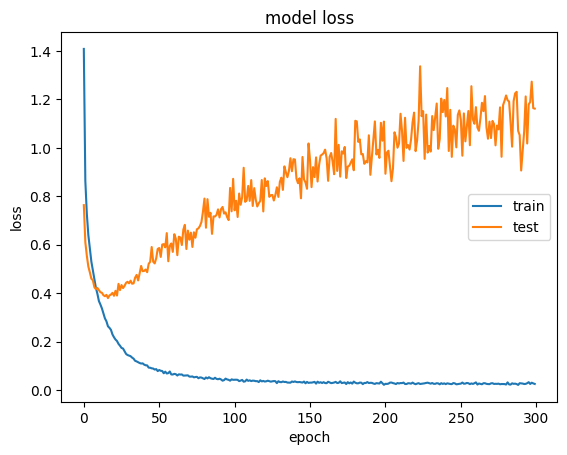

In [81]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

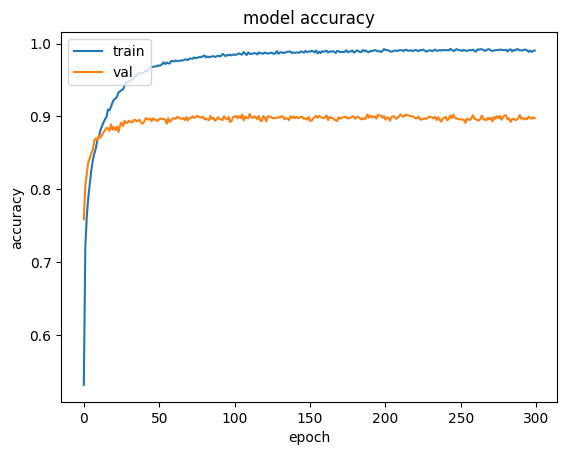

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
y_predict=model.predict(x_val.reshape(4140,13,156,1))
conf_mat=tensorflow.math.confusion_matrix(np.argmax(y_val,axis=1) , np.argmax(y_predict,axis=1))

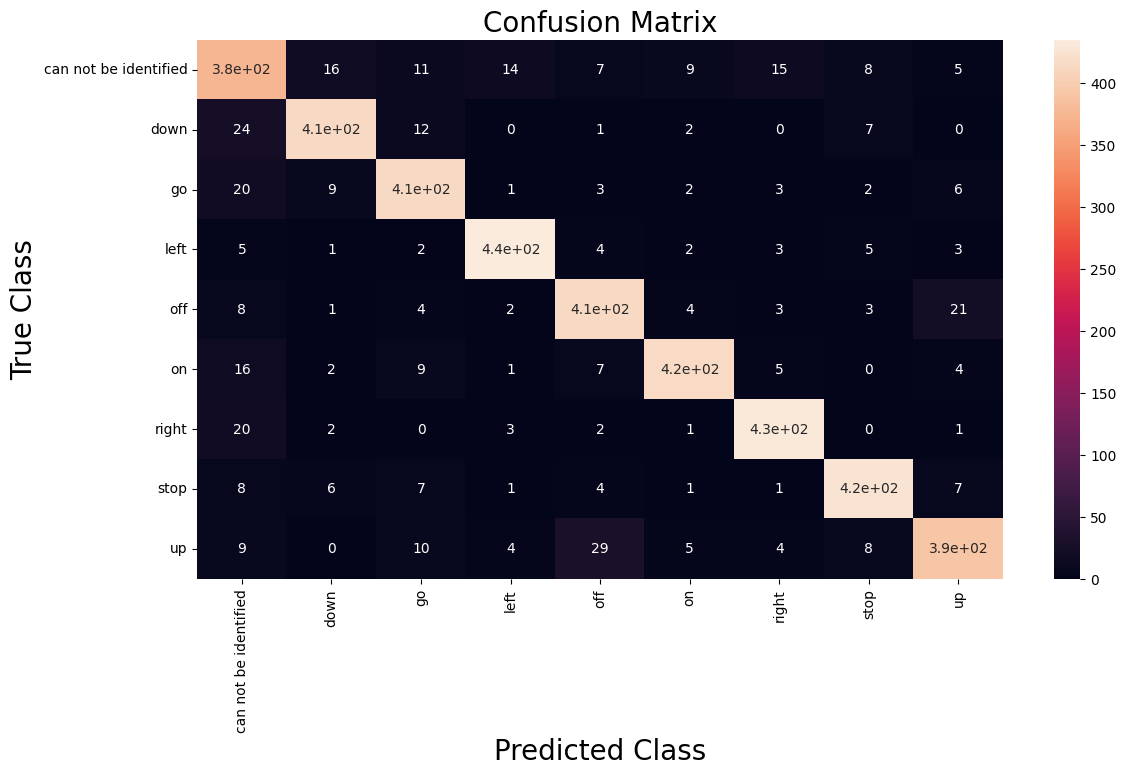

In [64]:
df_cm = pd.DataFrame(np.array(conf_mat), index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (13,7))
ax = sn.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel("True Class"     , fontsize=20)
plt.xlabel("Predicted Class", fontsize=20)
plt.show()

In [67]:

x_val[1].shape
model.predict(x_val.reshape(4140,13,156,1))

array([[0.00000000e+00, 0.00000000e+00, 4.54352261e-37, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.80497356e-10, 2.00981453e-23, 5.33658938e-29, ...,
        9.91334580e-25, 1.85010740e-17, 4.57608671e-19],
       [9.44991037e-03, 4.89653856e-14, 1.15450488e-11, ...,
        5.51528454e-01, 1.46158766e-10, 1.23530643e-08],
       ...,
       [3.72992911e-26, 8.21856799e-22, 1.00000000e+00, ...,
        0.00000000e+00, 5.55394400e-37, 1.05550266e-28],
       [2.38830592e-19, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38666625e-08, 4.80117800e-04, 2.25706745e-11, ...,
        2.47282826e-13, 9.99519825e-01, 1.42959271e-08]], dtype=float32)

In [68]:
def predict(audio):
    print(samples.shape)
    prob=model.predict(audio)
    index=np.argmax(prob[0])
    return classes[index]

In [71]:
import random
index=random.randint(0,len(x_val)-1)
print(index)
samples=x_val.reshape(4140,13,156,1)[index]
print("Audio:",classes[np.argmax(y_val[index])])
#ipd.Audio(np.array(all_wave)[index,:], rate=16000)

2657
Audio: right


In [80]:

from tensorflow.keras.models import load_model
model.save("MODEL.h5")